# Setup

[ 0.46440616 -0.81394507  0.03511338]


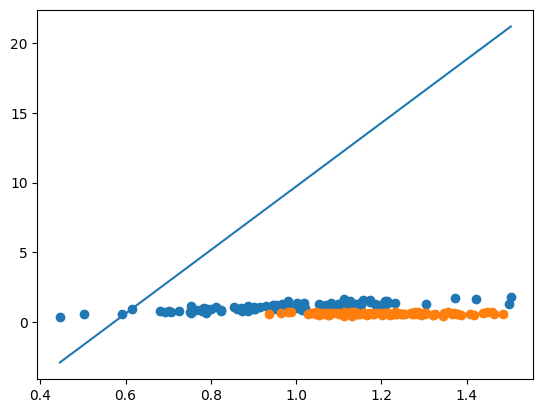

In [1]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(22)

# generate 10 points per class
N = 100

# we create a distribution
# generating random values from a gaussian distribution with mean (loc) 0.5 and stddev (scale) 0.1. multiplied by 2 to scale it
X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
# a kind of linear combination of X1_1 + random noise + 0.1
X2_1 = X1_1 + np.random.normal(loc = 0, scale = 0.15, size=N) + 0.1
# generate the labels of the points
Y1 = np.ones(N)


# do the same thing as above
X1_2 = 2*np.random.normal(loc=0.6, scale=0.05, size=N)
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N) #X1 * 2 + np.random.normal(loc = 0, scale = 0.1, size=N)
# generate the label of the points
Y2 = -np.ones(N)

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

# generate w_0,....,w_n
w = np.random.uniform(low=-1,size=3) # generating one possible directino of the hyperplane
print(w)
plt.plot([np.min(X1_1), np.max(X1_1)], [np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_2) * (-w[1]/w[2]) - w[0]/w[2]])

# Training

200

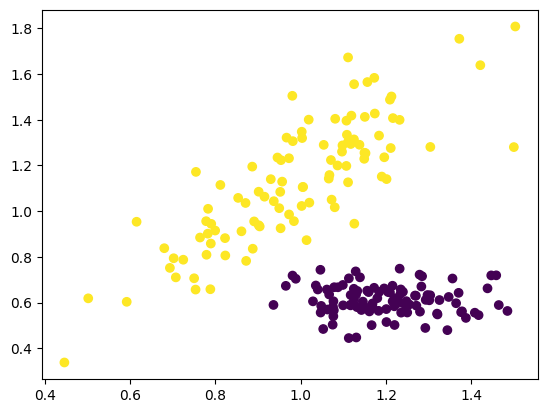

In [2]:
# adding the dimension X0, with all the points initialized to ones
X0 = np.ones(N * 2)
#X0 = X0[:, np.newaxis]

X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))

X = np.stack((X0, X1, X2), axis=1)

Y = np.concatenate((Y1, Y2))

#X = np.hstack((X0, np.vstack((X1, X2))))
plt.scatter(X[:, 1], X[:, 2], c=Y)

Y.shape[0]

1.0
16


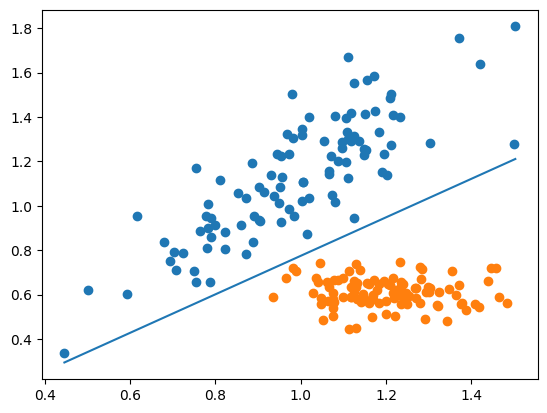

In [3]:
w_init = w

# generate w_0,....,w_n
#w = np.random.uniform(low=-1,size=3)

# set checkpoint
num_errors = 0

# check epochs
epochs = 0

# set learning rate 0 < eta <= 1
eta = 1e+0 # every time i do one epoch i want to slow down the learning a little bit

while True:
    
    epochs += 1
    
    for i in range(Y.shape[0]):
        x = X[i, :]
        y = Y[i]
        #print(x, y)
        
        dot_prod = np.dot(w, x)
        #print(dot_prod * y)
        
        if ((dot_prod * y) < 0):
            w = w + eta * (x * y)
            num_errors += 1
    
    if (num_errors == 0):
        break
    else:
        num_errors = 0
    

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
print(eta)
#print(num_errors)
print(epochs)
plt.plot([np.min(X1), np.max(X1)], [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]])